<a href="https://colab.research.google.com/github/aayushsh2003/ML/blob/main/Exp_4_Build_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***EXPERIMENT 4***

Build an Artificial Neural Network by
implementing the Backpropagation
algorithm and test the same using
appropriate data sets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
dataset_path_X='/content/drive/My Drive/3RD YEAR/ML_Database/X.npy'
dataset_path_y='/content/drive/My Drive/3RD YEAR/ML_Database/y.npy'

In [4]:
dataset_path_X

'/content/drive/My Drive/3RD YEAR/ML_Database/X.npy'

In [6]:
from re import X
X=np.load(dataset_path_X)

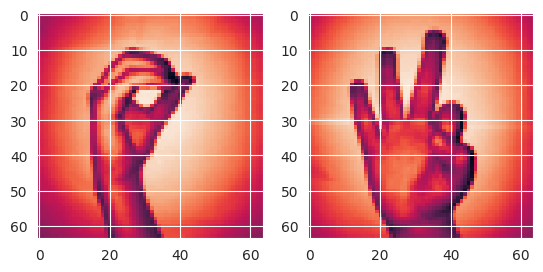

In [7]:
image_size=64
plt.subplot(1,2,1)
plt.imshow(X[399].reshape(image_size,image_size))
plt.subplot(1,2,2)
plt.imshow(X[189].reshape(image_size,image_size))

In [8]:
X = np.concatenate((X[204:409], X[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [10]:
print("Number of training examples are:-",number_of_train)
print("Number of test examples are:-",number_of_test)

Number of training examples are:- 348
Number of test examples are:- 62


In [13]:
# prompt: I have to use ann algo by using tensorflow keras model train it and Build an Artificial Neural Network by
# implementing the Backpropagation
# algorithm and test the same using
# appropriate data sets.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_size*image_size,)))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
X_train = X_train.reshape(number_of_train, image_size * image_size)
X_test = X_test.reshape(number_of_test, image_size*image_size)

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions (optional)
predictions = model.predict(X_test)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4806 - loss: 1.1873 - val_accuracy: 0.5323 - val_loss: 0.7181
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5053 - loss: 0.7164 - val_accuracy: 0.5323 - val_loss: 0.6503
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6508 - loss: 0.6513 - val_accuracy: 0.8548 - val_loss: 0.6082
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8412 - loss: 0.6020 - val_accuracy: 0.7742 - val_loss: 0.5575
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7957 - loss: 0.5442 - val_accuracy: 0.5645 - val_loss: 0.5814
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7806 - loss: 0.5126 - val_accuracy: 0.8387 - val_loss: 0.4356
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8667 - loss: 0.4187 - val_accuracy: 0.9516 - val_loss: 0.3507
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9074 - loss: 0.3736 - val_accuracy: 0.9516 - v